In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
import random

In [2]:
def GD(x,y_labels,lr,itera):
    
    theta0=0.1
    theta1=0.1
    error=[]
    #convert x,y to vector
    x_mod=x.reshape(-1,)
    y_mod=y_labels.reshape(-1,)
    
    saved_y=np.zeros(len(x_mod),) #save y_predit
    thetaAcc=np.zeros((itera,2))
    temp_y= thetaAcc=np.zeros((itera,2))
    
    for i in range(0,itera):#train n times
        
        ypred=theta0 + theta1*x_mod
        
        msqerror = (1/len(x_mod)) * np.sum( (ypred - y_mod) ** 2)
       
        gradient_0 = (1/len(x_mod)) * np.sum((ypred-y_mod))
        gradient_1 = (1/len(x_mod)) * np.sum((ypred-y_mod)*x_mod)
        theta0 -= lr*gradient_0
        theta1 -= lr*gradient_1
        #temp_y=ypred
        thetaAcc[i]=[theta0,theta1]
        error.append(msqerror)
        
        if i==(itera-1):
            saved_y=ypred
           
            
    return thetaAcc,error,saved_y,theta0,theta1

In [3]:
data,labels=make_regression(n_features=1,n_informative=1,bias=10,noise=10,random_state=0)

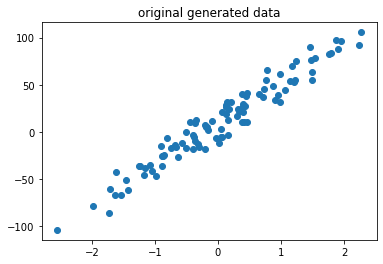

In [4]:
plt.scatter(data,labels)
plt.title("original generated data")
plt.show()

# split data and preprocess it

In [39]:
x_train,x_test,y_train,_y_test=train_test_split(data,labels,test_size=0.3)

#preprocess data, center around 0 mean
stand=StandardScaler() #create obj from stnd scaler

x_train=stand.fit_transform(x_train)

x_test=stand.transform(x_test)




In [40]:
lr=0.001
n=10000

thetaAcc,error,ysaved,w0,w1=GD(x_train,y_train,lr,n)

print(ysaved.shape)

error[-1],w0,w1

(70,)


(126.60153347885131, 13.008664174828432, 41.51315944078792)

# R2_score and rmse

In [41]:
r2score=r2_score(y_train,ysaved)
r2score

0.9315704105597452

# plot error against epochs

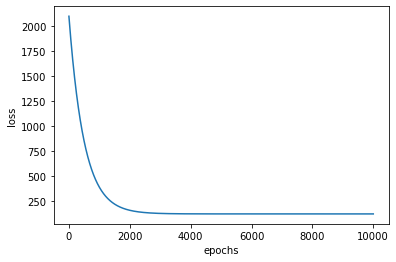

In [30]:
rang=np.arange(0,n,1)
plt.plot(rang,error)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# normal eqn op

In [67]:
def normal_eqn(x,y): #theta=(xTx)^-1@(xTy)
    
    m=x.shape[0]
    y=y.reshape(m,1)
    x=np.append(x,np.ones((m,1)),axis=1)
   
    thetas=np.linalg.inv(x.T@x)@(x.T@y)
    return thetas

In [70]:
weights=normal_eqn(x_train,y_train)
weights

array([[41.5150303 ],
       [13.00924733]])

# contour plot

In [11]:
x0=np.linspace(thetaAcc[0][-1]-10,thetaAcc[0][-1]+10,70) #get optimum thetas
x1=np.linspace(thetaAcc[1][-1]-10,thetaAcc[1][-1]+10,70)
thetaAcc[0][-1]

0.1411363563810774

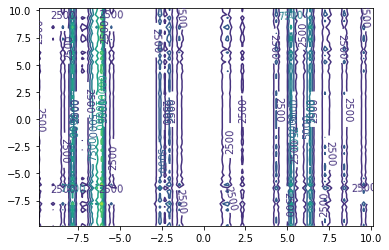

In [12]:
X0,X1=np.meshgrid(x0,x1) #3d shape of xs
y=X0+X1*x_train #regression eqn
cm=plt.cm.get_cmap('viridis')
erro=(y_train-y)**2
#plt.scatter(X0,X1,c=erro,cmap=cm)
cp=plt.contour(X0,X1,erro)
plt.clabel(cp,inline=1)
plt.show()

# comparing to linearReg existing model

In [48]:
model=LinearRegression().fit(x_train,y_train)
line=model.coef_*x_train+model.intercept_
r2_score(y_train,line)


0.9315704126395583